# Import Library

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Loading the Dataset

In [80]:
data = pd.read_csv("playstore-analysis (2) (1).csv")

In [81]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [82]:
data.shape

(10841, 13)

# 1. Data clean up – Missing value treatment

### A. Drop records where rating is missing since rating is our target/study variable

In [83]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [84]:
data = data.dropna(subset=['Rating'])

### B. Check the null values for the Android Ver column. 

In [85]:
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up'], dtype=object)

In [86]:
data[data['Android Ver'].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


####  i. Are all 3 records having the same problem?

# Yes

#### ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [87]:
data=data[data['App']!='Life Made WI-Fi Touchscreen Photo Frame']

#### iii. Replace remaining missing values with the mode

In [88]:
data.mode()['Android Ver']

0    4.1 and up
Name: Android Ver, dtype: object

In [89]:
data['Android ver']=data['Android Ver'].fillna(data['Android Ver'].mode(), inplace=True)

### C. Current ver – replace with most common value

In [90]:
data[data['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up,None
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up,None
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up,None
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up,None


In [91]:
data['Current Ver']=data['Current Ver'].fillna(data.mode()['Current Ver'][0])

# 2. Data clean up – correcting the data types

### A. Which all variables need to be brought to numeric types?

In [92]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Android ver        object
dtype: object

In [93]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,None
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,None
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,None
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,None
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,None


# Reviews
# Price


### B. Price variable – remove $ sign and convert to float

In [94]:
data['Price']=data['Price'].str.lstrip('$') 

In [95]:
data["Price"] = pd.to_numeric(data["Price"], downcast="float")

In [96]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price             float32
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Android ver        object
dtype: object

### C. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [97]:
data['Installs'] = data['Installs'].astype(str).str.replace('+','')

C:\Users\Sumit\AppData\Local\Temp/ipykernel_18652/2719200741.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Installs'] = data['Installs'].astype(str).str.replace('+','')


In [98]:
data['Installs'] = data['Installs'].str.replace(',', '')

In [99]:
data['Installs'] = data['Installs'].astype(int)

In [100]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,None
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,None
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,None
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,None
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,None


### D. Convert all other identified columns to numeric

In [101]:
data['Reviews'] = data['Reviews'].astype(int)

In [102]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float32
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Android ver        object
dtype: object

# 3. Sanity checks – check for the following and handle accordingly

### A. Avg. rating should be between 1 and 5, as only these values are allowed on the play Are there any such records? Drop if so.

In [103]:
pd.unique(data[['Rating']].values.ravel())

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

## No any values present between 1 to 5 in rating column 

### B. Reviews should not be more than installs as only those who installed can review the Are there any such records? Drop if so.

In [104]:
data['Reviews'] = data['Reviews'].astype(int)

In [105]:
data[data.Reviews <= data.Installs]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,None
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,None
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,None
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,None
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,None
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,None
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,None
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,None


# 4. Identify and handle outliers

# A. Price column

### i. Make suitable plot to identify outliers in price

C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


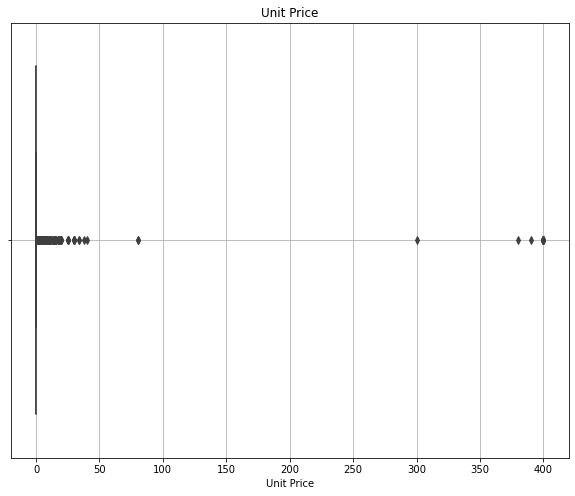

In [106]:
plt.subplots(figsize=(10,8))
sns.boxplot(data.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid(linestyle='-')
plt.show()

### ii. Do you expect apps on the play store to cost $200? Check out these cases

In [107]:
rslt_df = data[data['Price'] == 200]
print(rslt_df)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver, Android ver]
Index: []


### iii. After dropping the useless records, make the suitable plot again to identify outliers

C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


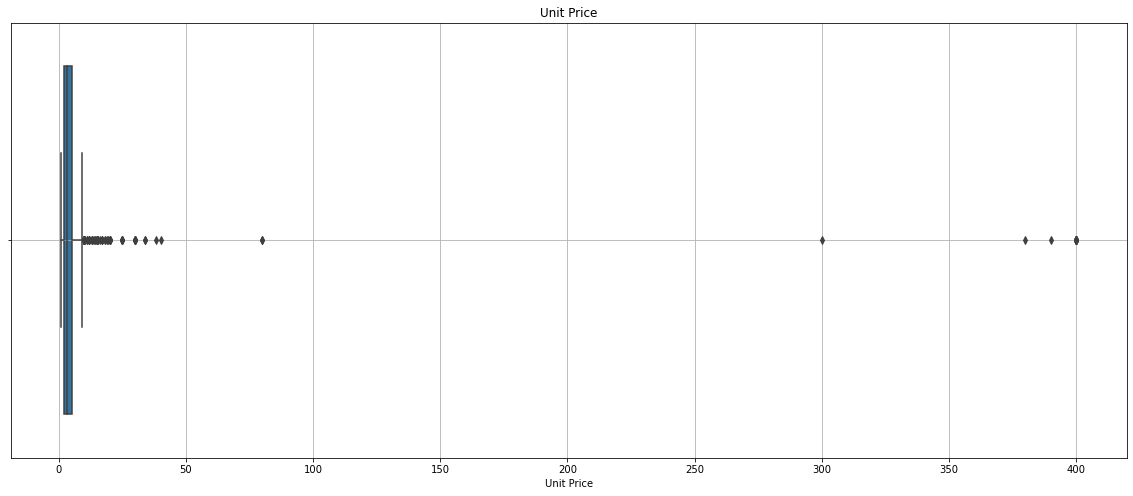

In [109]:
usful_df = data[data['Price'] != 0]
# usful_df
plt.subplots(figsize=(20,8))
sns.boxplot(usful_df.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid()
plt.show()

### iv. Limit data to records with price < $30

In [111]:
limit_data = data[data['Price'] < 30]
limit_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,None
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,None
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,None
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,None
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,None


# B. Reviews column

### i. Make suitable plot

Category
GAME                   1585419577
COMMUNICATION           815461799
SOCIAL                  621241091
FAMILY                  410223081
TOOLS                   273184168
PHOTOGRAPHY             213516607
SHOPPING                115041033
PRODUCTIVITY            114116717
VIDEO_PLAYERS           110379692
PERSONALIZATION          89345815
SPORTS                   70829568
TRAVEL_AND_LOCAL         62617772
ENTERTAINMENT            59178154
NEWS_AND_MAGAZINES       54399899
EDUCATION                39595010
HEALTH_AND_FITNESS       37893622
MAPS_AND_NAVIGATION      30659060
BOOKS_AND_REFERENCE      21958660
FINANCE                  17550406
WEATHER                  14604695
BUSINESS                 13954086
LIFESTYLE                12881769
FOOD_AND_DRINK            8883009
DATING                    7291039
HOUSE_AND_HOME            3976004
COMICS                    3381945
ART_AND_DESIGN            1714372
MEDICAL                   1585622
AUTO_AND_VEHICLES         1163630
LIBRA

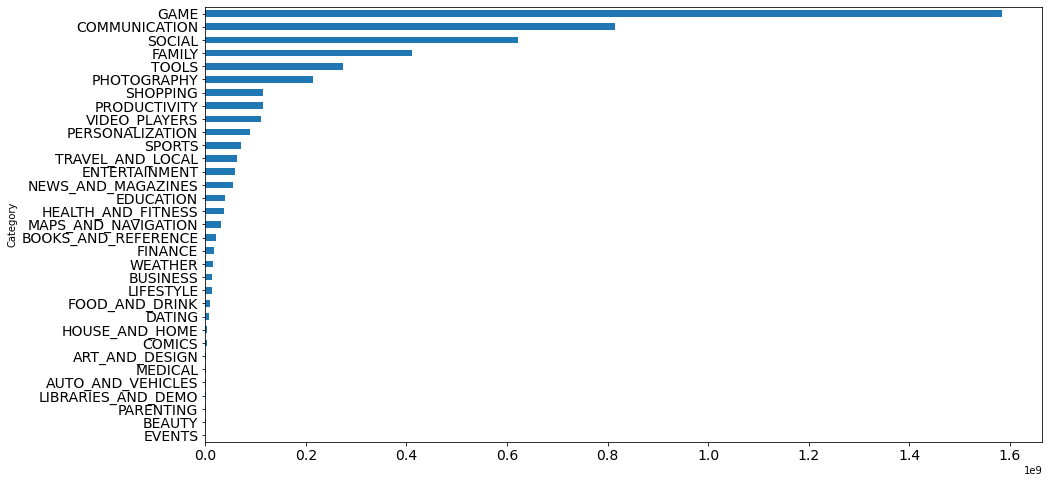

In [113]:
total=data.groupby('Category')['Reviews'].sum().sort_values()
plt.subplots(figsize=(15,8))
total.plot(kind='barh', fontsize=14)
print(total.sort_values(ascending=False))
plt.show()

### ii. . Limit data to apps with < 1 Million reviews

In [114]:
limit_data_by_review = data[data['Reviews'] < 1000000]
limit_data_by_review.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,None
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,None


In [115]:
limit_data_by_review.shape

(8662, 14)

# C. Installs

### i. What is the 95th percentile of the installs?

In [116]:
val = data.Installs.quantile(0.95) 
print(val)

100000000.0


### ii. Drop records having a value more than the 95th percentile


In [117]:
x = data.Installs.quantile() > val
print (x)

False


# Data analysis to answer business questions

## 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

### A. How do you explain this?

C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


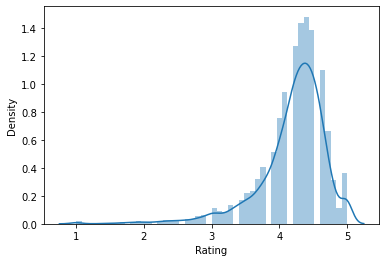

In [118]:
sns.distplot(data['Rating'])
plt.show()

### B. What is the implication of this on your analysis?

###  This is Left Skewed(Negative Skewness) so in this graph mode>median>mean.

# 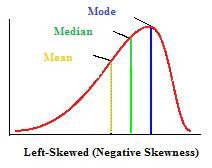

## 6. What are the top Content Rating values?

### A. Are there any values with very few records?

In [119]:
data['Content Rating'].value_counts()

Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

### B. If yes, drop those as they won’t help in the analysis

In [120]:
Adult_rating = data[data['Content Rating'] == 'Adults only 18+'].index.to_list()
unrated =data[data['Content Rating'] == 'Unrated'].index.to_list()
data.drop(Adult_rating, inplace = True)
data.drop(unrated, inplace = True)
data['Content Rating'].value_counts()

Everyone        7420
Teen            1084
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

# 7. Effect of size on rating

## A. Make a joinplot to understand the effect of size on rating

In [ ]:
sns.jointplot(x=data['Size'],y=data['Rating'],data=data,kind='hex')
plt.show()

## B. Do you see any patterns?

 # Yes, we can see here the pattern that the size of application 0 to 20000 having higher rating as compaired to size of application which is greater than 20000.

## C. How do you explain the pattern?

 # That means the application with higher size have low rating so pepole will preferre application which is smaller in size.

# 8. Effect of price on rating

## A. Make a jointplot (with regression line)

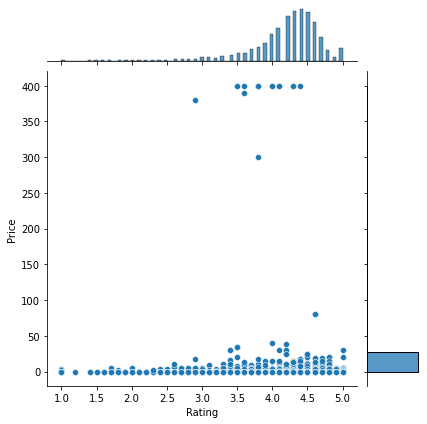

In [121]:
sns.jointplot(x ="Rating" , y = "Price" ,data = data)
plt.show()

## B. What pattern do you see?

# We can see most of the applications having price less than 50.

## C. How do you explain the pattern?

#  The applications of higher price do not have high rating.

## D. Replot the data, this time with only records with price > 0

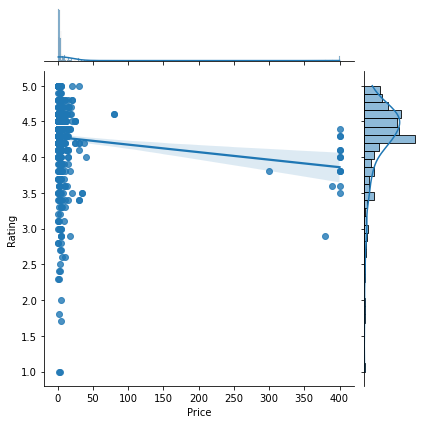

In [122]:
Price_greaterthan_zero = data[data['Price'] > 0]
sns.jointplot(x ="Price" , y = "Rating" ,data = Price_greaterthan_zero, kind = "reg" )
plt.show()

## E. Does the pattern change?

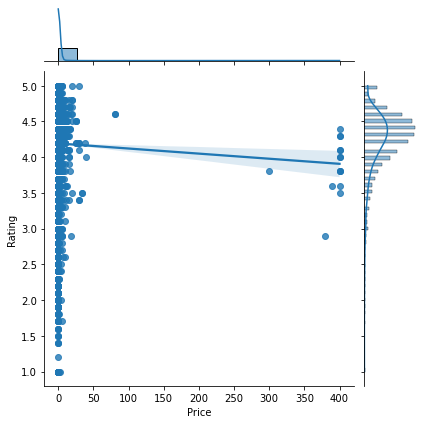

In [123]:
sns.jointplot(x ="Price" , y = "Rating" ,data = data, kind = "reg" )
plt.show()

# There is no any change in data interpretation even after removing the zero still showing increasing price with decreasing rating. 

## F. What is your overall inference on the effect of price on the rating

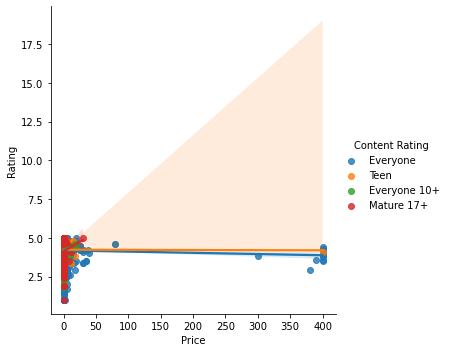

In [124]:
sns.lmplot(x='Price', y='Rating', hue ='Content Rating', data=data)
plt.show()

# 9. Look at all the numeric interactions together –  

### A. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

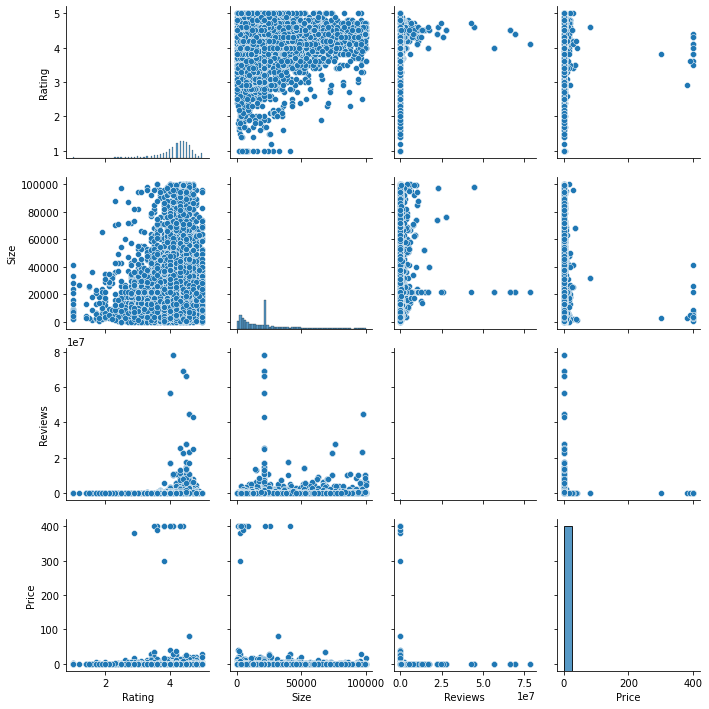

In [126]:
sns.pairplot(data,vars=['Rating','Size', 'Reviews', 'Price'])
plt.show()

# 10. Rating vs. content rating

### A. Make a bar plot displaying the rating for each content rating

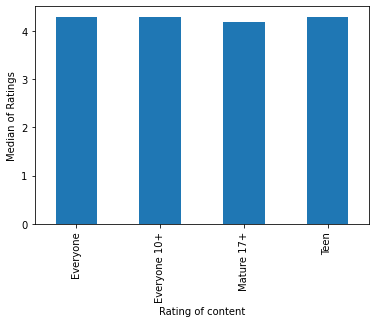

In [127]:
a = data['Rating'].groupby(data['Content Rating']).median().plot(kind = 'bar')
a.set(xlabel ='Rating of content', ylabel = 'Median of Ratings')
plt.show()

### B. Which metric would you use? Mean? Median? Some other quantile?

# Median

### C. Choose the right metric and plot

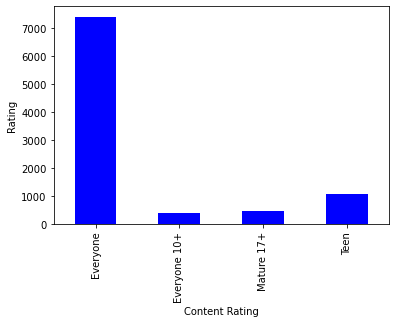

In [128]:
data.groupby(['Content Rating'])['Rating'].count().plot.bar(color="b")
plt.ylabel('Rating')
plt.show()

# 11. Content rating vs. size vs. rating – 3 variables at a time

### A.Create 5 buckets (20% records in each) based on Size

C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


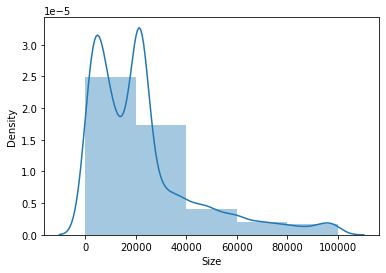

In [129]:
sns.distplot(data["Size"], bins=5)
plt.show()

In [130]:
bins=[0, 4600, 12000, 21516, 32000, 100000]
data['Size_Buckets'] = pd.cut(data['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])
pd.pivot_table(data, values='Rating', index='Size_Buckets', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,4.116056,4.188889,3.951429,4.232323
LOW,4.161853,4.207143,4.129592,4.209655
MED,4.188627,4.300000,3.900000,4.131847
HIGH,4.245527,4.227273,4.208497,4.243333
VERY HIGH,4.208134,4.287805,4.197170,4.279603


### B. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [131]:
data.Size.quantile([0.2, 0.4,0.6,0.8])

0.2     5100.000000
0.4    14000.000000
0.6    21516.529524
0.8    34000.000000
Name: Size, dtype: float64

In [132]:
data.Rating.quantile([0.2, 0.4,0.6,0.8])

0.2    3.9
0.4    4.2
0.6    4.4
0.8    4.6
Name: Rating, dtype: float64

### C. Make a heatmap of this

In [133]:
Size_Buckets =pd.pivot_table(data, values='Rating', index='Size_Buckets', columns='Content Rating', 
                     aggfunc=lambda x:np.quantile(x,0.2))
Size_Buckets

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,3.8,3.84,3.28,3.90
LOW,3.8,3.94,3.64,3.88
MED,3.9,4.16,3.50,3.90
HIGH,4.0,4.00,4.00,4.00
VERY HIGH,3.9,4.10,4.00,4.00


#### i. Annotated

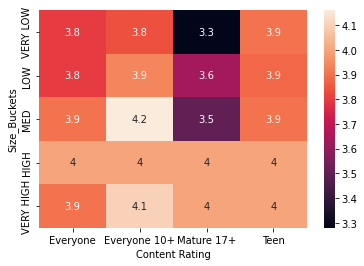

In [134]:
sns.heatmap(Size_Buckets, annot = True)
plt.show()

#### ii. Greens color map

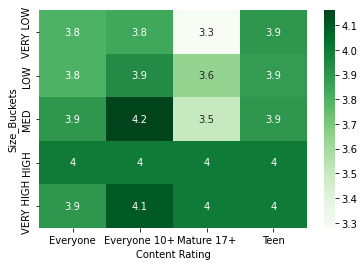

In [135]:
sns.heatmap(Size_Buckets, annot=True, cmap='Greens')
plt.show()

### D. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

# As we can see lighter app is preferred in Adult only 18+ categories and for Everyone is in High categories,Everyone 10+ is in very high, Teen and Mature17+ is in very high categories and last one is Unrated which is in low categories.